# Medidas de dispersión

In [1]:
import pandas  as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cars_df = pd.read_csv("../data/cars.csv")
cars_df.head(2)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83


## Desviación estándar

In [3]:
cars_df["price_usd"].std()

6428.152018202915

## Rango
valor máximo - valor mínimo

In [4]:
rango = cars_df["price_usd"].max() - cars_df["price_usd"].min()
rango

49999.0

## Quartiles 

In [5]:
median = cars_df["price_usd"].median()
Q1 = cars_df["price_usd"].quantile(q=0.25) # 1er 25% de los datos
Q3 = cars_df["price_usd"].quantile(q=0.75) # 3er 25% de los datos

min_val = cars_df["price_usd"].quantile(q=0) # q=0 -> Nos regresa el valor más pequeño del conjunto
max_val = cars_df["price_usd"].quantile(q=1) # q=1 -> 1=100%,  Nos regresa el valor más grande del conjunto


print(min_val, Q1, median, Q3, max_val)

1.0 2100.0 4800.0 8990.0 50000.0


In [6]:
IQR = Q3 - Q1
IQR

6890.0

## Límites para detección de outliers (datos simetricamente distribuidos)
Datos entre $$Q_1 - 1.5 * IQR$$ y $$Q_3 + 1.5 * IQR$$

In [8]:
min_limit = Q1 - 1.5*IQR
max_limit = Q3 + 1.5*IQR
print(min_limit, max_limit)

-8235.0 19325.0


En el límite mínimo obtenemos un valor negativo `-8,235.0`, por que los datos no estan simétricamente distribuidos, y la formula que aplicamos solo es valida para distribuciones simétricas.

<Axes: xlabel='price_usd', ylabel='Count'>

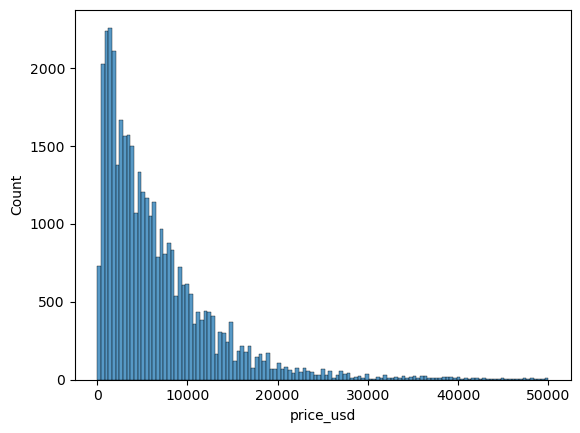

In [9]:
sns.histplot(cars_df["price_usd"])

<Axes: >

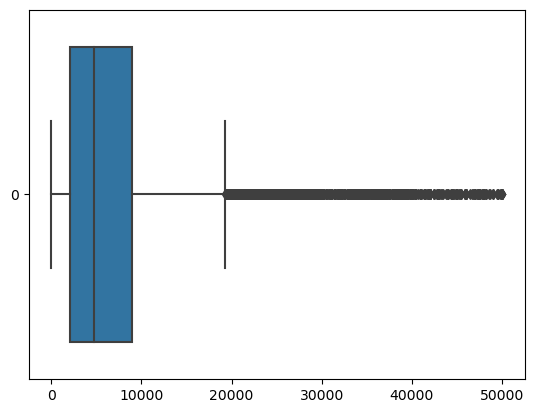

In [11]:
sns.boxplot(cars_df["price_usd"],orient="horizontal")

Con el boxplot obtenemos un resumen visual de los precios de autos usuados, en él observamos facilmente los siguientes datos:
1. Quartiles: 1, 2 (mediana) y 3
2. Límites: Mínimo y Máximo
3. Outliers: Valores atípicos

Resumen de los precios de autos usados por una categoría especifica:
- Tipo de motor

<Axes: xlabel='engine_type', ylabel='price_usd'>

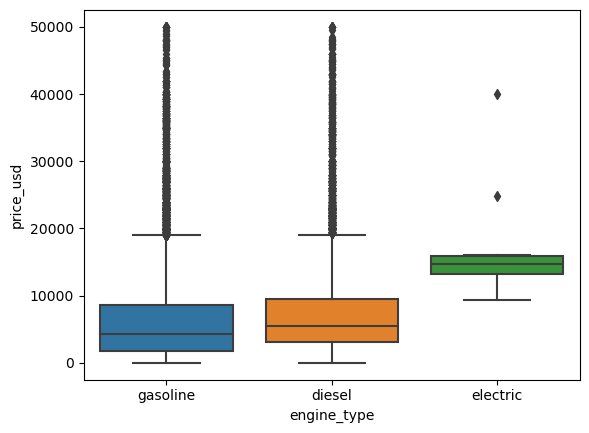

In [13]:
sns.boxplot(data=cars_df, x="engine_type", y="price_usd")